# Posture Monitor Data Analysis

Extract data from `.dat` files and then display using matplotlib

In [1]:
from analyze import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

## Input meta data manually

In [2]:
# Conditions key:
# b = buzz, s = silent
# j = Justin's WG, r = Seminar room, c = Cafeteria
# e = easy, h = hard

subject_meta = {}
subject_meta[14] = 'bje'
subject_meta[15] = 'bre'
subject_meta[16] = 'sch'
subject_meta[17] = 'sce'
subject_meta[18] = 'sch'
subject_meta[19] = 'sce'
subject_meta[20] = 'bjh'

## Load data using functions in analyze.py

In [3]:
data = load_all_data()
subject_id = 20
s20 = get_subject(data,subject_id)
baseline = get_baseline(s20)
times, widths = get_distances(s20)
time_delta = [(x-times[0]).total_seconds() for x in times]

/Users/justinshenk/Projects/sensei/analyze.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'baseline' in v:


## Display subject data before and after outlier removal

<IPython.core.display.Javascript object>


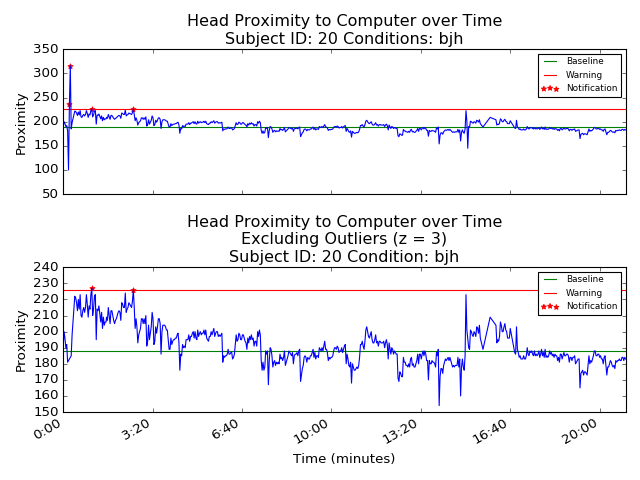

In [25]:
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1)

# Plot raw data
plot_it(ax1,time_delta,widths,baseline=baseline)

# Exlude outliers
# z-score threshold (3) to limit errors caused by signal noise
z_threshold = 3 

# Keep items within z-score of `z_threshold`
time_keep, width_keep = remove_outliers(time_delta, widths, z_threshold)

# Plot clean data
title = """Head Proximity to Computer over Time
Excluding Outliers (z = {})
Subject ID: {} Condition: {}""".format(z_threshold,subject_id, 
                               subject_meta[subject_id])
plot_it(ax2,time_keep,width_keep, baseline=baseline,title=title)
    
plt.tight_layout()
plt.show()

## Plot majority of subjects

<IPython.core.display.Javascript object>


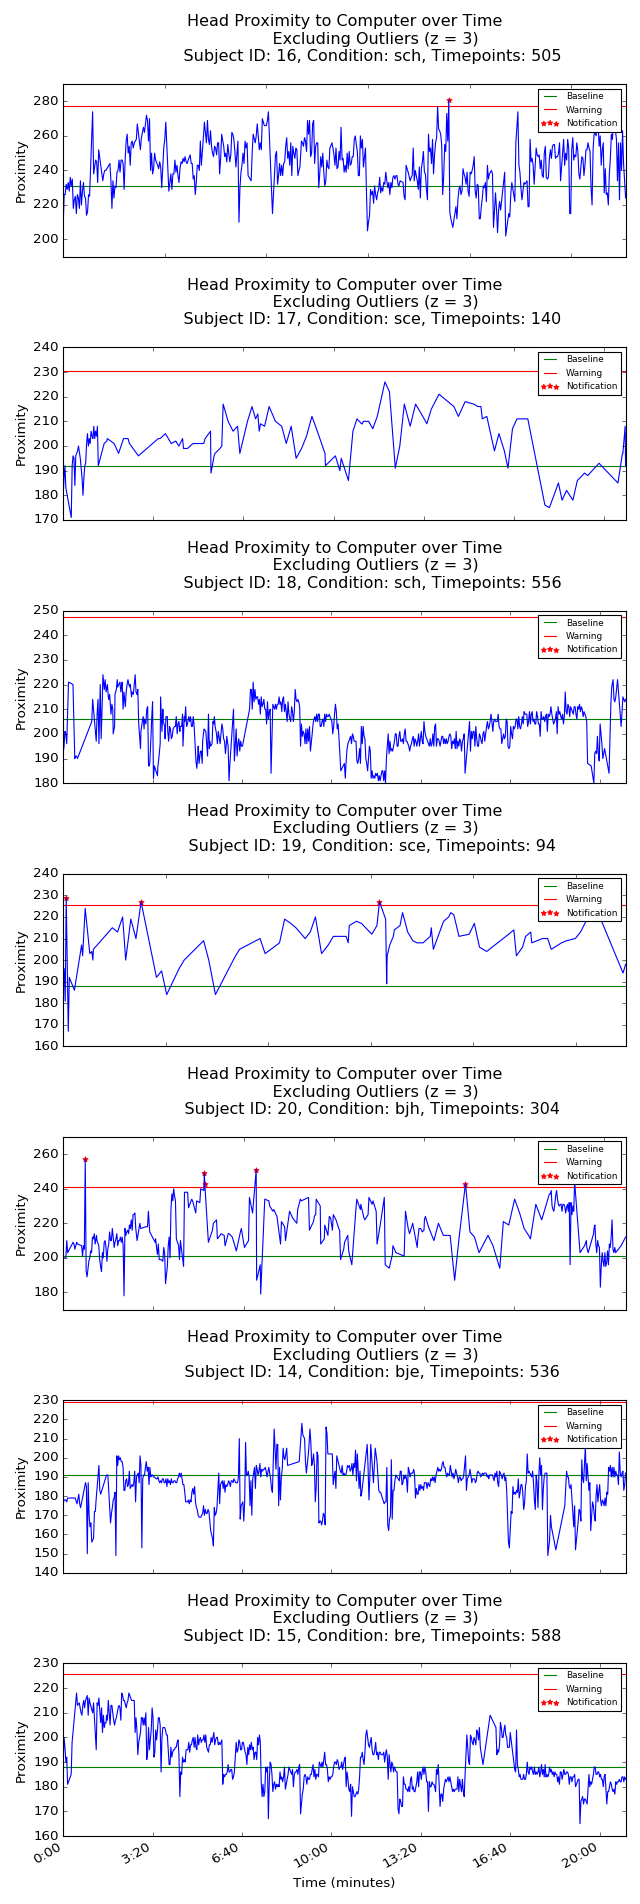

/Users/justinshenk/Projects/sensei/analyze.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'baseline' in v:


In [26]:
plot_subjects(data, subject_meta.keys(),exclude_outliers=True)